# Chapter 6 与学习相关的技巧

## 6.1 参数的更新 Update Parameters
SGD, etc.

### 6.1.2 SGD
W <- W - lr * grads

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.3 SGD的缺点 the deficiencies of SGD

- 在极值点有等高线，那么梯度会指向等高线，而非点，如f(x,y)=1/20*x^2+y^2
- if shape of function is anisotropic, the efficiency of search path will be low.

### 6.1.4 Momentum
v <- av - lr * grads  
w <- w+v

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.key():
            self.v[key] = self.momentum*self.v[key]-self.lr*grads[key]
            params[key] += self.v[key]

In [5]:
class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

### 6.1.5 AdaGrad

learning rate is important in the study of neural network. if lr is too little, it needs more time for study. Conversely, if lr is too large, it results in diverging study that it could not run formally.  

Learning rate decay could reduce the learning rate following the study.  

h <- h + grads * grads  
W <- W - lr * 1/sqrt(h) * grads

If the study is continuous infinitely, the update will become 0. To solve this problem, we can use *RMSProp* method. RMSProp method will not add all the grads. It gradually "forgets" the past grads, which will reflect the recent grads upated. （指数移动平均）

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h += grads[key]*grads[key]
            params[key] -= self.lr * grads[key]/(np.sqrt(self.h[key])+1e-7)

In [4]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam
Combine the Momentum and AdaGrad  

it will set 3 hyperparameters. 
- lr(learning rate)
- Beta1(momentum coefficient)
- Beta2(momentum coefficient)
Commonly we set beta1 equal to 0.9, beta2 equal to 0.999.

In [6]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

## 6.2 权重的初始值 Weight Initialization

### 6.2.1 可以将权重初始值设为0吗 Can the weights be initialized as 0s?

Weight Decay: Weight decay is a study method targeted at weight reduction. By reducing weights to inhibit overfitting.  

Actually before that, we initialized the weight like kind of 0.01 * np.random.randn(10,100).  

We might notice that they will pass the same values during both the forward and backward propagation. Therefore, we must use random values as initial weights to prevent that. (权重均一化，瓦解权重的对称结构)

### 6.2.2 隐藏层的激活值分布 Distribution of activation value in hidden layers.

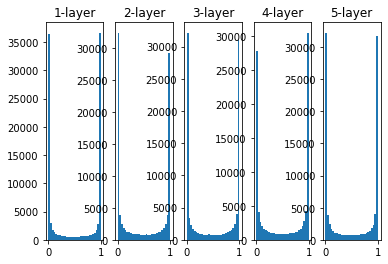

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.random.randn(1000, 100) # 1000 datasets with 100 features
node_num = 100 # nodes at each hidden layer
hidden_layer_size = 5 # hidden layers size
activations = {} # activations are stored in dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num)*1
    z = np.dot(x, w)
    a = sigmoid(z) 
    activations[i] = a

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

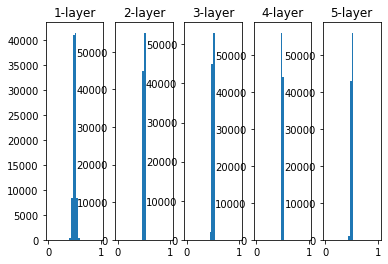

In [11]:
x = np.random.randn(1000, 100) # 1000 datasets with 100 features
node_num = 100 # nodes at each hidden layer
hidden_layer_size = 5 # hidden layers size
activations = {} # activations are stored in dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num)*0.01
    z = np.dot(x, w)
    a = sigmoid(z) 
    activations[i] = a

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

各层的激活值呈偏向0和1的分布，这里使用的sigmoid函数是s型函数，随着输出不断地靠近0或者靠近1，它的导数的值逐渐接近0， 因此偏向0和1的数据分布会造成反向传播中的梯度值不断变小，最后消失。梯度消失gradient vanishing。  
但如果出现激活值偏向某个值，那么就表明神经元都输出相同的值，激活值分布上有所偏向“表现力受限”问题。  

我们尝试使用Xavier初始值

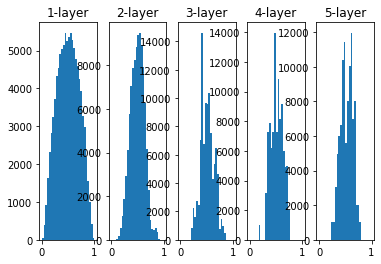

In [14]:
x = np.random.randn(1000, 100) # 1000 datasets with 100 features
node_num = 100 # nodes at each hidden layer
hidden_layer_size = 5 # hidden layers size
activations = {} # activations are stored in dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num)/np.sqrt(node_num)
    z = np.dot(x, w)
    a = sigmoid(z) 
    activations[i] = a

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3 ReLU的权重初始值 
*因为sigmoid函数和tanh函数左右多称，所以适用Xavier初始值*  

如果激活函数为ReLU时，一般推荐使用ReLU专用的初始值，也就是Kaiming He等人推荐的初始值，也称为*He初始值*

He初始值使用标准差为sqrt(2/n)的高斯分布。当Xavier初始值为sqrt(2/n)时，直观上可以解释为，因为ReLU的负值区域的值为0，为了使它更有广度，所以需要2倍的系数。  

## 6.3 Batch Normalization

### 6.3.1 Batch Normalization的算法
Merits:
- prompt the study(able to enlarge the learning rate)
- reduce the dependency on initiallization(decrease the sensititivities)
- inhibit overfitting(decrease the Dropout, etc.)  

Ex:  
Affine -> Batch Norm -> ReLU -> Affine -> Batch Norm -> ReLU -> Affine -> Softmax -> output  

Batch Norm，以mini-batch为单位，按mini-batch进行0-1正规化.  

### 6.3.2 Batch Normalizaion的评估 the Evaluation of Batch Norm

AUC

## 6.4 正则化 Normalization

### 过拟合 Overfitting

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normaliza = True)
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_layer_list=[100,100,100,100,100,100,100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

NameError: name 'load_mnist' is not defined

### 6.4.2 权值衰退 Weight Decay(岭回归)
范数：
- L0: sum(abs(xi)^0)
- L1: sum(abs(xi)^1) logit regression: sum(xi * wi) + b
- L2: sum(abs(xi)^2) Ridge Regression/Weight Decay

L2范数的权值衰减就是1/2 * Lambda * W^2，将这个加到loss function里， lambda是控制正则化强度的超参数，lambda越大，对大的权重施加的惩罚越重。  

### 6.4.3 Dropout
如果模型过于复杂，那么权值衰减就难以应付了，这个时候可以使用Dropout方法。Dropout方法是一种在学习的过程中随机删除神经元的方法。删除的是隐藏层的神经元。

In [16]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0-self.dropout_ratio)
    def backward(self, dout):
        return dout*self.mask

机器学习中经常使用集成学习，所谓集成学习，就是让多个模型单独进行学习，推理时再取多几个模型的输出的平均值。

## 6.5 超参数的验证
### 6.5.1 验证数据

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 打乱训练数据
x_train, t_train = shuffle_dataset(x_train, t_train)

# 分割验证数据
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation:]
t_train = t_train[validation:]

NameError: name 'load_mnist' is not defined

### 6.5.2 超参数的最优化
- 确定超参数的番位
- 从设定的超参数范围中随机采样
- 使用步骤1中采样到的参数的值进行学习，通过验证数据评估识别精度（但是要将epoch设置得很小）
- 重复以上两步
可以使用Bayesian optimization贝叶斯最优化

### 6.5.3 超参数最优化的实现

In [18]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)